# Problem 2a

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.cross_validation import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.preprocessing import OneHotEncoder

input_file = "network_backup_dataset.csv"

dataset = pd.read_csv(input_file, header = 0) 
indices = dataset.columns
for i, v in enumerate(indices):
    print (" Index[" + str(i) + "] " + v)

files = ['File_{0}'.format(x) for x in range(len((pd.unique(dataset['File Name']))))]



 Index[0] Week #
 Index[1] Day of Week
 Index[2] Backup Start Time - Hour of Day
 Index[3] Work-Flow-ID
 Index[4] File Name
 Index[5] Size of Backup (GB)
 Index[6] Backup Time (hour)


In [41]:
# all the functions for 2a
def scalarencoding(index, data):
    if index == indices[1]:
        return data.replace({'Day of Week': {'Monday' : 0, 'Tuesday' : 1, 'Wednesday' : 2, 'Thursday' : 3, 'Friday' : 4,'Saturday' : 5, 'Sunday' : 6}})
    elif index == indices[3]:
        return data.replace({'Work-Flow-ID': {'work_flow_0' : 0, 'work_flow_1' : 1, 'work_flow_2' : 2, 'work_flow_3' : 3, 'work_flow_4' : 4}})
    elif index == indices[4]:
        for i,j in zip(files,range(len(files))):
            data = data.replace({'File Name': {i : j}})
        return data
    else:
        return data

def twoplots(training):
    predict = cross_val_predict(linearregression, training, target, cv = 10)


    fig, ax = plt.subplots()
    ax.scatter(target, predict)
    ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw = 4)
    ax.set_xlabel('True')
    ax.set_ylabel('Fitted')
    plt.title('Fitted values vs. Actual values')
    plt.show()



    fig, ax = plt.subplots()
    ax.scatter(predict, predict-target)
    ax.set_xlabel('Fitted')
    ax.set_ylabel('Residual')
    plt.title('Residuals vs. Fitted value')
    plt.show()

In [51]:
for i in range(len(indices)):    
    dataset = scalarencoding(indices[i], dataset)
    
    
#print dataset  
linearregression = LinearRegression()
training = dataset.copy()
training.drop('Backup Time (hour)', axis=1,inplace = True)
trainingdata = training.copy()
target = training.pop(indices[5])
linearregression.fit(training,target)    

# number of splits in corss validation
KFOLD = 10
kf = KFold(n_splits = KFOLD, shuffle = True, random_state = 42)
kf.get_n_splits(trainingdata)

for trainset, testset in kf.split(trainingdata):
    train_set = trainingdata.iloc[trainset, :]
    test_set = trainingdata.iloc[testset, :]
    
    train_target = train_set.pop(indices[5])
    test_target = test_set.pop(indices[5])
    
    train_predict = linearregression.predict(train_set)
    test_predict = linearregression.predict(test_set)
    print ("RMSE for Training Data: ", sqrt(mean_squared_error(train_target, train_predict)))
    print ("RMSE for Testing Data: ", sqrt(mean_squared_error(test_target, test_predict)))

('RMSE for Training Data: ', 0.1033855511267813)
('RMSE for Testing Data: ', 0.10541077511390294)
('RMSE for Training Data: ', 0.10458656784362276)
('RMSE for Testing Data: ', 0.0941472161531634)
('RMSE for Training Data: ', 0.10330817513187095)
('RMSE for Testing Data: ', 0.10609124609667478)
('RMSE for Training Data: ', 0.10328148408682084)
('RMSE for Testing Data: ', 0.10632484851215361)
('RMSE for Training Data: ', 0.10391919121586904)
('RMSE for Testing Data: ', 0.10057790729763391)
('RMSE for Training Data: ', 0.10403774495114905)
('RMSE for Testing Data: ', 0.0994688660654486)
('RMSE for Training Data: ', 0.10268010484908041)
('RMSE for Testing Data: ', 0.11144321139403808)
('RMSE for Training Data: ', 0.10259429238617493)
('RMSE for Testing Data: ', 0.11215215704141318)
('RMSE for Training Data: ', 0.10487370887063496)
('RMSE for Testing Data: ', 0.09121963050062146)
('RMSE for Training Data: ', 0.10320712556058104)
('RMSE for Testing Data: ', 0.10697462573309999)


Fitted values vs. Actual values:


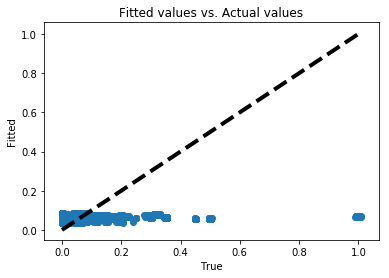

Residuals vs. Fitted value


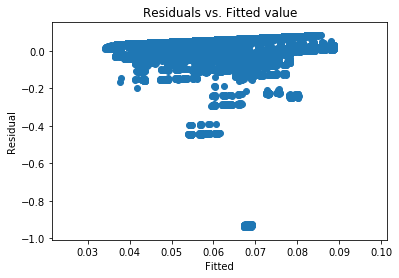

In [40]:
twoplots(training)

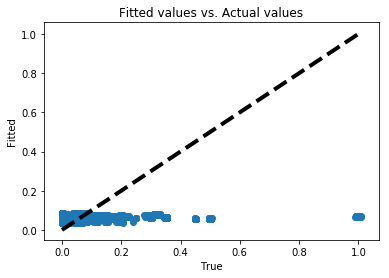

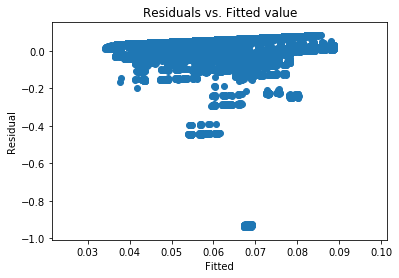

In [44]:
# (ii) standardize

scaler = StandardScaler(copy = False, with_mean=False, with_std=True)
scaler.fit(training)
training_fitted = scaler.transform(training)
linearregression.fit(training_fitted,target)

twoplots(training_fitted)


In [49]:
# (iii) using f regression and mutual information regression measure to determine 3 most important features
best_fregression = SelectKBest(f_regression, k=3)  #using selectkbest two select 3 most important variables
best_fregression_fitted = best_fregression.fit_transform(training_fitted,target)
print("f_regression: " + str(best_fregression.get_support()))


f_regression: [False  True  True  True False]


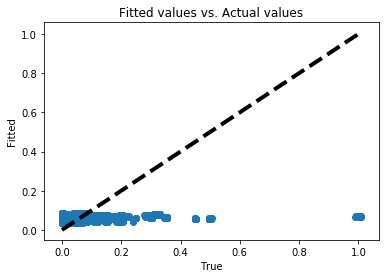

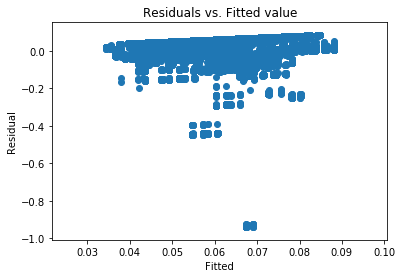

In [54]:
# Thus we select  Day of Week, Backup Start Time - Hour of Day, Work-Flow-ID as our 3 most important features

training_fregression = training.iloc[:,1:4]

linearregression = LinearRegression()
linearregression.fit(training_fregression,target)

twoplots(training_fregression)

In [56]:
best_mir = SelectKBest(mutual_info_regression, k=3)  #using selectkbest two select 3 most important variables
best_mir_fitted = best_mir.fit_transform(training_fitted,target)
print(" mutual_info_regression: " + str(best_mir.get_support()))

 mutual_info_regression: [False False  True  True  True]


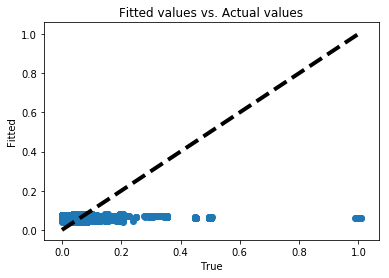

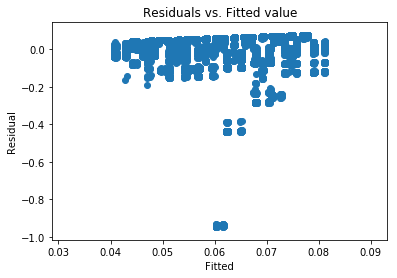

In [57]:
# Thus we select Backup Start Time - Hour of Day, Work-Flow-ID, File Name as our 3 most important features
training_mir = training.iloc[:,2:5]

linearregression = LinearRegression()
linearregression.fit(training_mir,target)

twoplots(training_mir)

In [60]:
# (iv) Applying 32 combinations 
onehotencoding= OneHotEncoder()
onehotencoding_fitted = onehotencoding.fit_transform(training)